In [1]:
from pathlib import Path
import sys
sys.path.extend([str(Path.home() / 'PycharmProjects/item_matching')])

from qwen_model import QwenVLInference
from notebooks.examples.func import Draw

In [2]:
path = Path.home() / 'Downloads/Data/images'
files = [*path.glob('*.jpg')]
files[:2]

[PosixPath('/Users/kevinkhang/Downloads/Data/images/vn-11134207-7r98o-lwy55dz5ad3v99@resize_w900_nl.jpg'),
 PosixPath('/Users/kevinkhang/Downloads/Data/images/460338846_10236547857824241_8141109386541390635_n.jpg')]

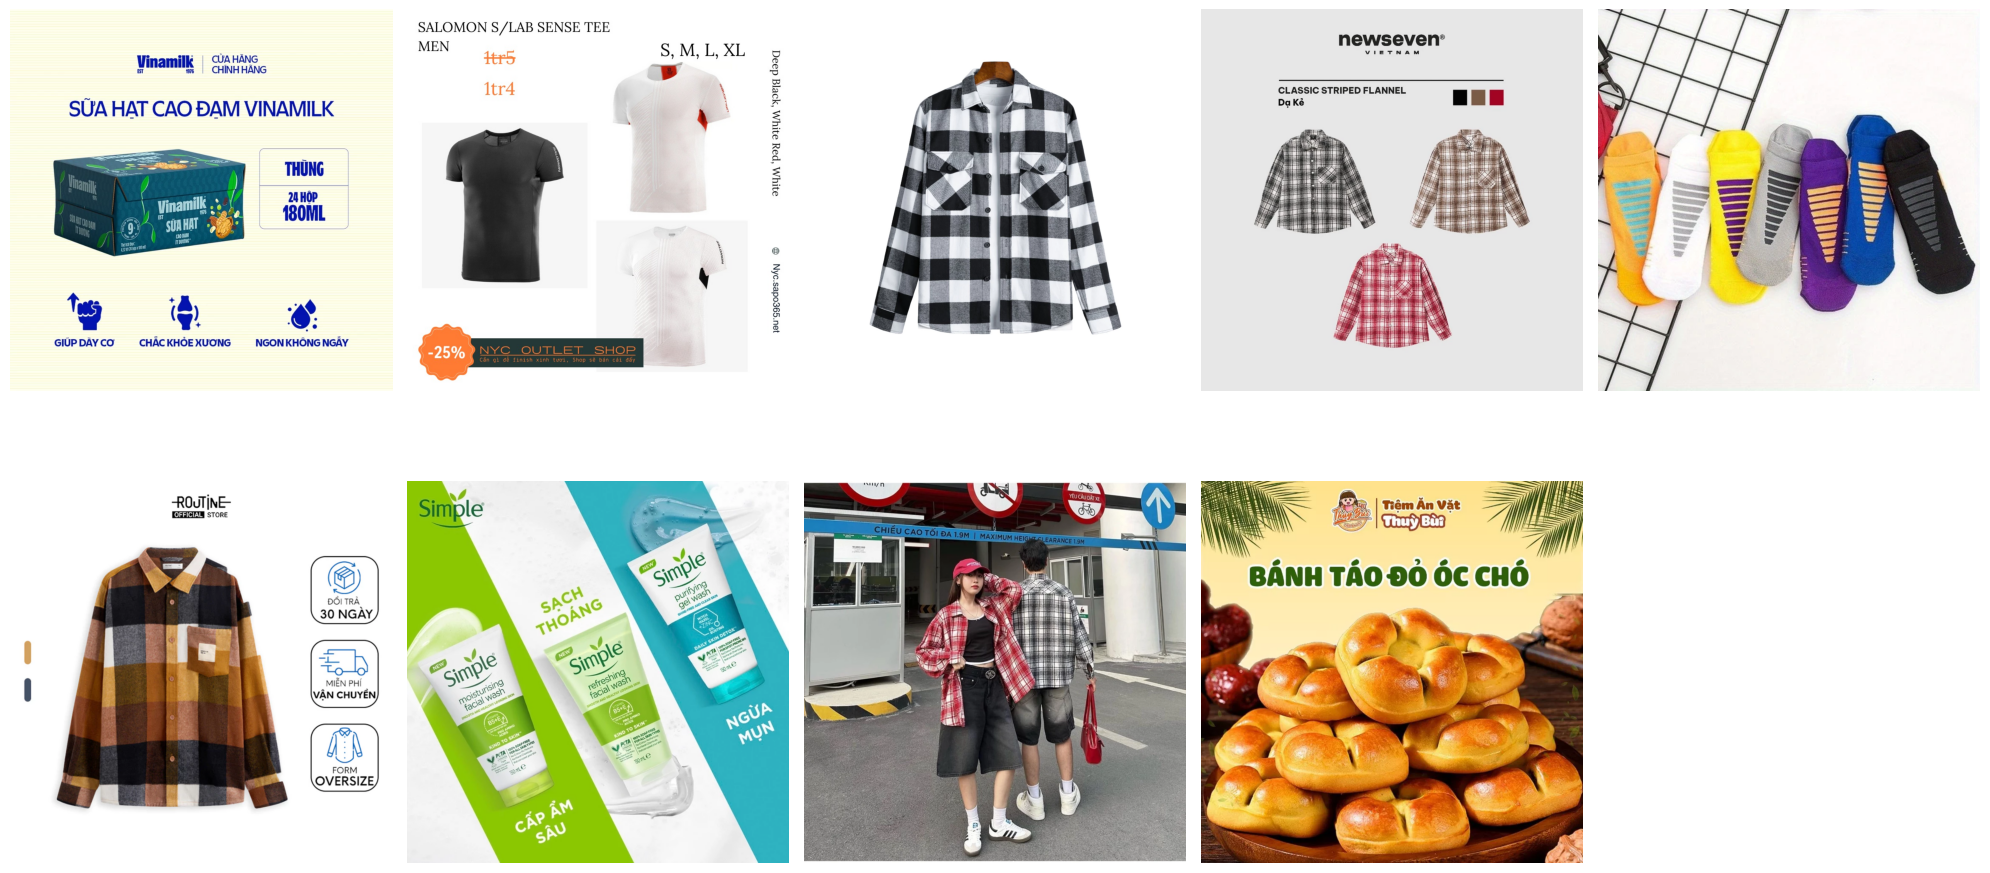

In [3]:
Draw.plot_multiple_images(files)

In [4]:
q = QwenVLInference()

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[QwenVL Infer] Device: mps:0, Flash Attention 2: False


In [5]:
# messages = [
#     {
#         "role": "user",
#         "content": [
#             {"type": "image", "image": str(files[0])},
#             {"type": "image", "image": str(files[1])},
#             # {"type": "text", "text": "Identify the similarities between these images."},
#             # {"type": "text", "text": "what is the name of product, brand or company in these images"},
#             # {"type": "text", "text": "Compare products in these images"},
#         ],
#     }
# ]
# output = q.run(messages)
# print(output)

In [6]:
dict_ = {}
for f in files:
    output = q.run(f)
    dict_[f] = output

[Visual Summarization] Time: 17s
[Visual Summarization] Time: 15s
[Visual Summarization] Time: 12s
[Visual Summarization] Time: 17s
[Visual Summarization] Time: 13s
[Visual Summarization] Time: 15s
[Visual Summarization] Time: 14s
[Visual Summarization] Time: 12s
[Visual Summarization] Time: 17s


/Users/kevinkhang/PycharmProjects/item_matching/notebooks/examples/func.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


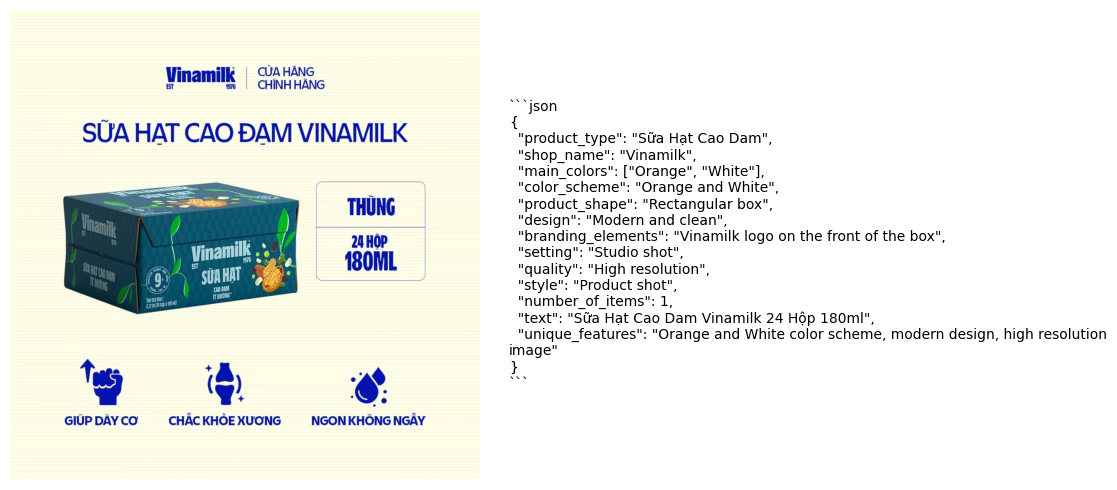

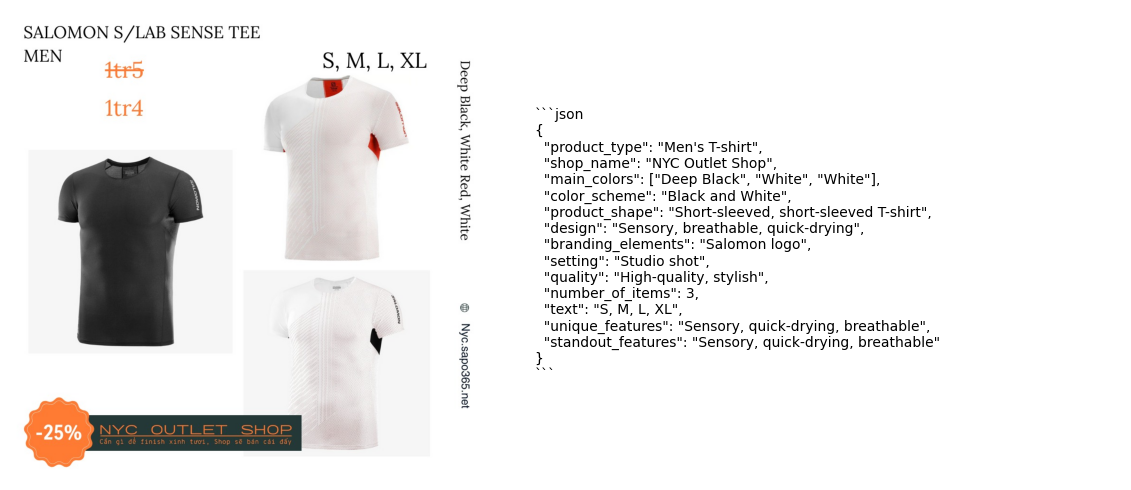

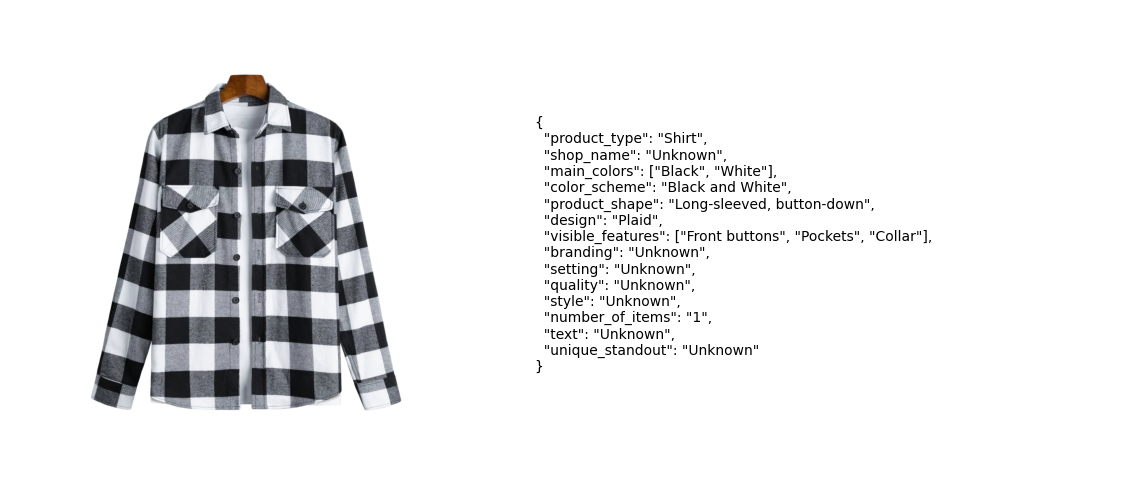

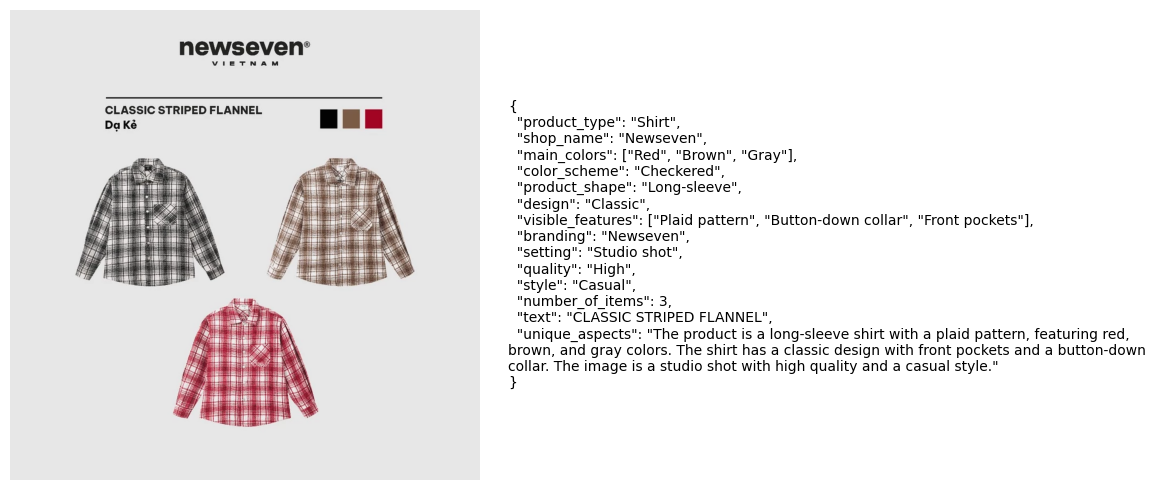

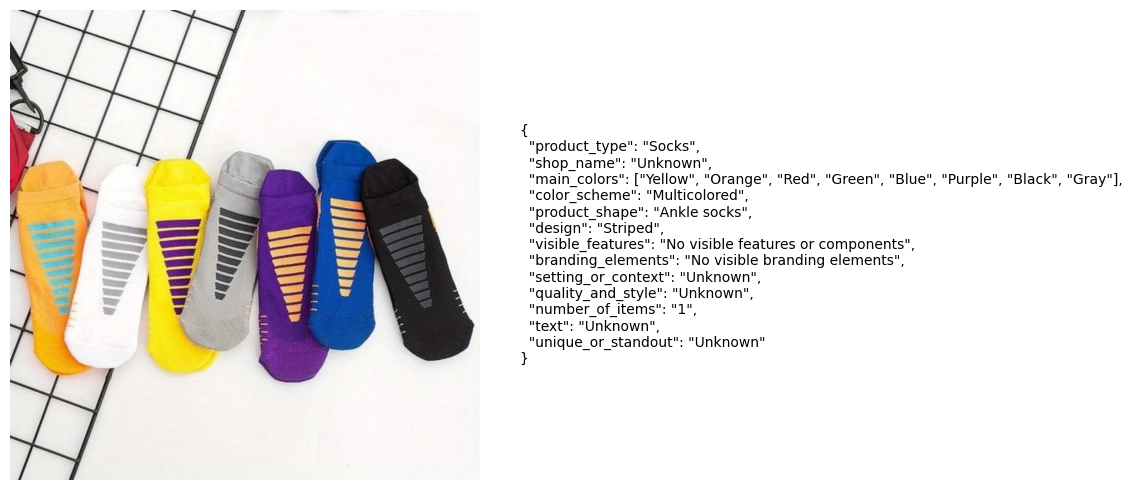

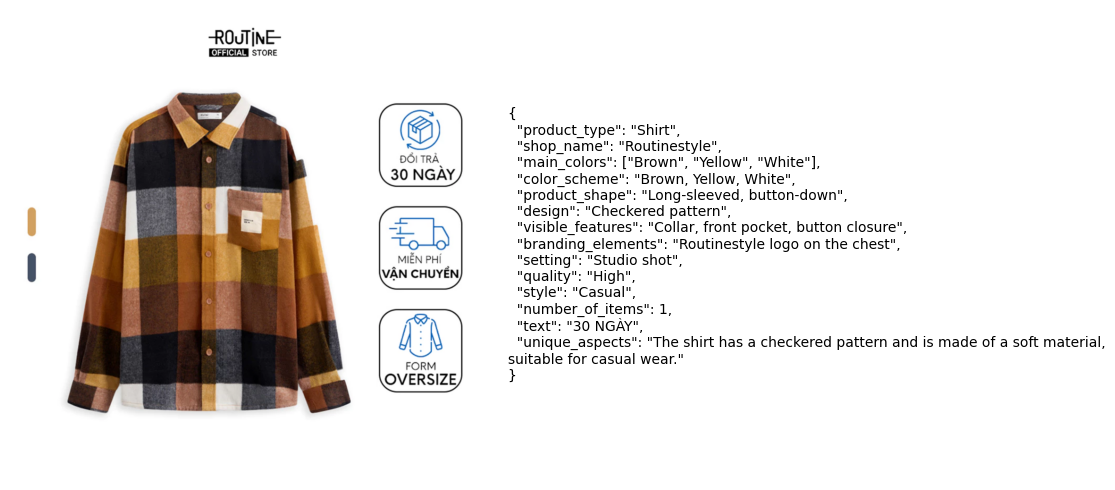

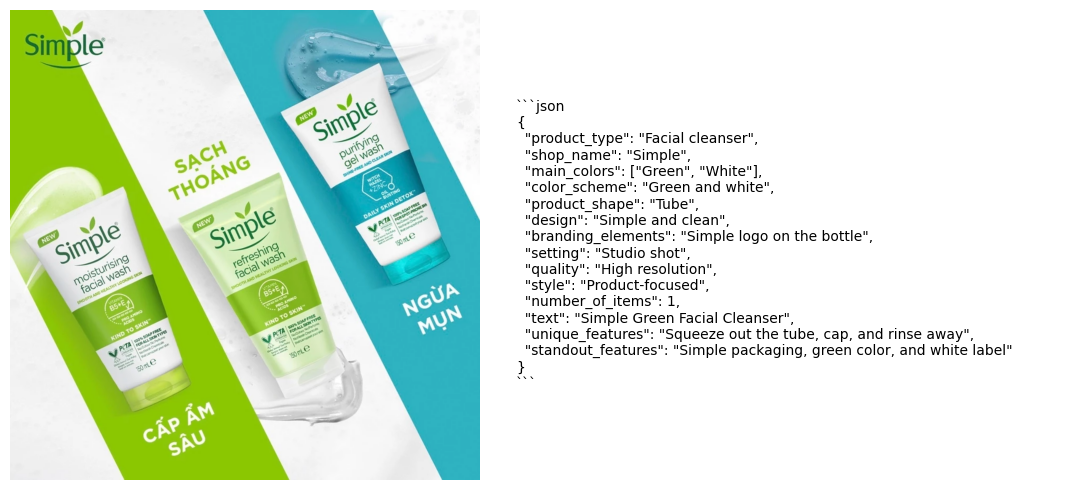

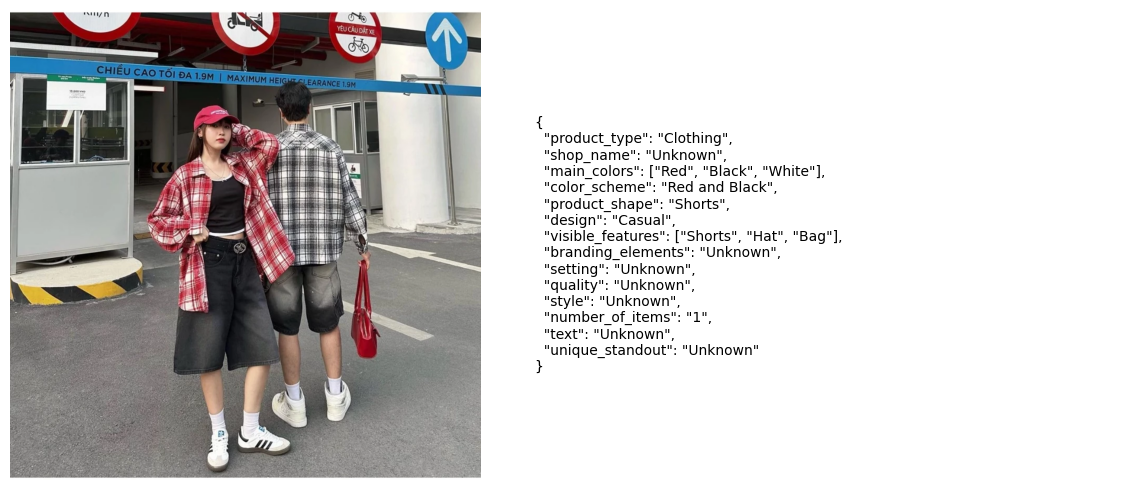

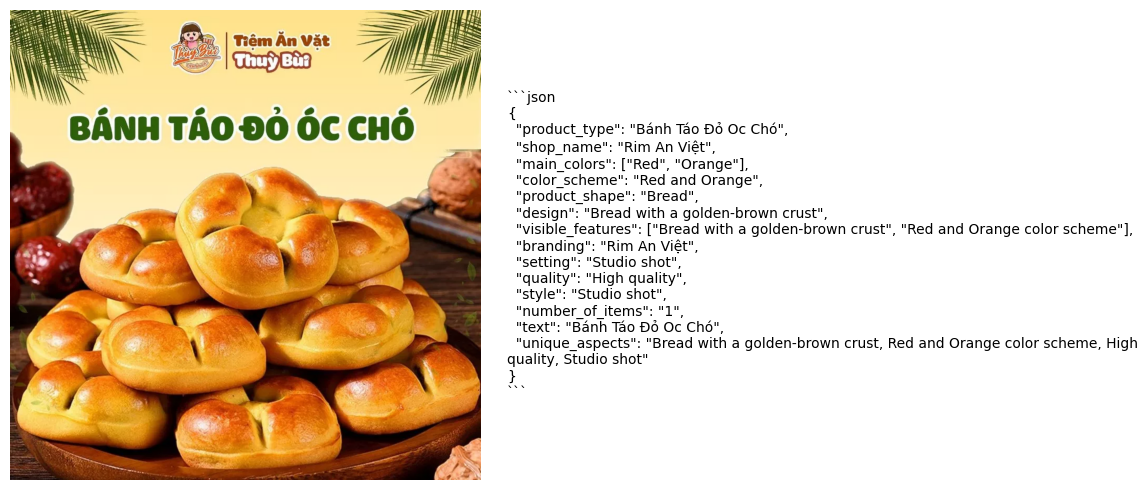

In [7]:
for f in files:
    Draw().plot_one_image_long_caption(f, dict_[f])

In [8]:
# conversation = [
#     {
#         "role": "user",
#         "content": [{"type": "image"}, {"type": "text", "text": "Hello, how are you?"}],
#     },
#     {
#         "role": "assistant",
#         "content": "I'm doing well, thank you for asking. How can I assist you today?",
#     },
#     {
#         "role": "user",
#         "content": [
#             {"type": "text", "text": "Can you describe these images and video?"},
#             {"type": "image", "image": str(files[0])},
#             {"type": "image", "image": str(files[1])},
#             {"type": "text", "text": "These are products from e-commerce."},
#         ],
#     },
#     {
#         "role": "assistant",
#         "content": "I'd be happy to describe the images and video for you. Could you please provide more context?",
#     },
#     {
#         "role": "user",
#         "content": "These are products from e-commerce. Can you see the details in the images?",
#     },
# ]
# output = q.run(messages, vision_id=True)
# print(output)